In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

#### Import the data

In [2]:
raw_data = pd.read_csv('1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


#### Now we preprocess the data

In [3]:
raw_data.describe(include = 'all') 
"""By default only numerical variables are included in the description. To include categorical variables, we 
pass the include argument and set the value to all"""


'By default only numerical variables are included in the description. To include categorical variables, we \npass the include argument and set the value to all'

#### We select the variables we need for our regression

#### Since we have 312 unique values under model, this implies that we have 312 dummy variables, so we drop the 'Model' column

In [4]:
data = raw_data.drop(['Model'], axis =1) # We take out model 
data.describe(include = 'all') 

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [5]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [6]:
"""Having discovered the missing values in the dataset, since the sum of these obervations are less than 5% of 
the total observations, we eliminate all obervations with null values"""
data_no_mv = data.dropna(axis = 0)

In [7]:
data_no_mv.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


#### From the description above, we notice that the max price, mileage and engive volume value is susbstantially larger than the prices within the 25th, 50th and 75th percentile. This is due to outliers 

### Exploring the PDFs of the variables

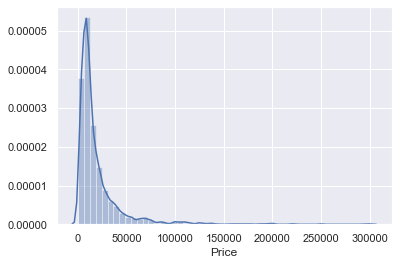

In [8]:
sns.distplot(data_no_mv['Price'])

#### To eliminate the outliers,we take out the top 1% of obervations for Price, Mileage and Engine Volume

In [9]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price'] < q]
data_1.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


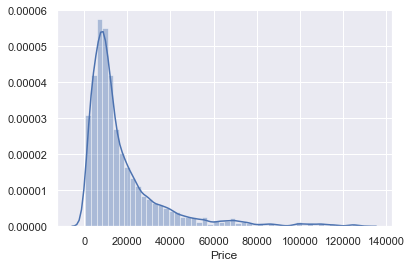

In [10]:
sns.distplot(data_1['Price'])

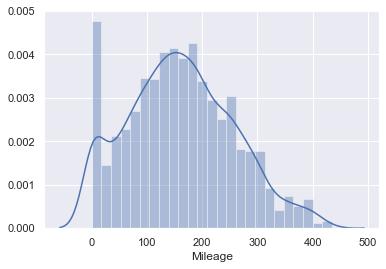

In [11]:
p = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage'] < p]
sns.distplot(data_2['Mileage'])

#### We also notice that for the engine volume, we have some values up to 99.0 which shouldn't be so as we have learned from our research that engne volume should be between 0.6 and 6.5 but as it appears in the data, some missing values have been assigned 99.9

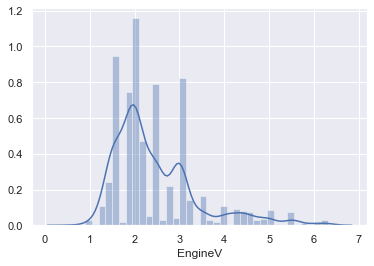

In [12]:
data_3 = data_2[data_2['EngineV'] < 6.5]
sns.distplot(data_3['EngineV'])

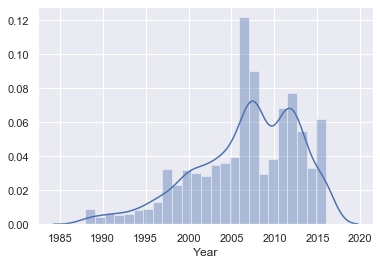

In [13]:
r = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year'] > r]
sns.distplot(data_4['Year'])

In [14]:
"""In order to let our indexes represent the filtered/cleaned data, we reset the indexes and drop the indexes of the 
raw data"""
data_cleaned = data_4.reset_index(drop = True) 
data_cleaned.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


#### Checking the OLS assumptions

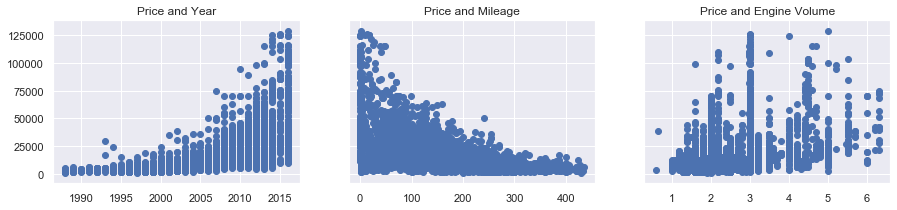

In [15]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey = True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title("Price and Year")

ax2.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax2.set_title("Price and Mileage")

ax3.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax3.set_title("Price and Engine Volume")

plt.show()

#### We notice that the relationship between these variable isn't linear and the price is not normally distributed so we apply log transformation

In [16]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price

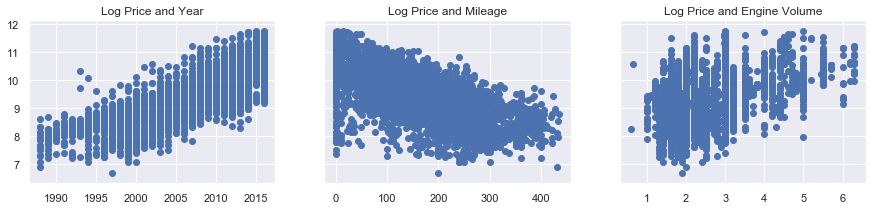

In [17]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey = True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title("Log Price and Year")

ax2.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax2.set_title("Log Price and Mileage")

ax3.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax3.set_title("Log Price and Engine Volume")

plt.show()

In [18]:
data_cleaned = data_cleaned.drop(['Price'],axis =1)
data_cleaned.describe(include = 'all')

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
count,3867,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867.000000
unique,7,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,848,1467,NaN,NaN,1807,3505,NaN,NaN
mean,NaN,NaN,160.542539,2.450440,NaN,NaN,2006.709853,9.415703
std,NaN,NaN,95.633291,0.949366,NaN,NaN,6.103870,0.876616
min,NaN,NaN,0.000000,0.600000,NaN,NaN,1988.000000,6.684612
25%,NaN,NaN,91.000000,1.800000,NaN,NaN,2003.000000,8.881836
50%,NaN,NaN,157.000000,2.200000,NaN,NaN,2008.000000,9.367344
75%,NaN,NaN,225.000000,3.000000,NaN,NaN,2012.000000,9.985068


### OLS Assumptions

#### Following the CLT, we expect that large data sets are normally distributed such as this one. Also since we have done a log transformation, there is no homoscedasticity. The relationship is linear as shown in the graph above. There is also no endogeneity and autocorrelation

#### Multicollinearity

##### To check for multicollinearity, we use the vif(variance inflation factor)

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

In [21]:
vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


#### We see tha the VIF of the predictor variable 'year' has a high multicollinearity which implied that it is highly correlated with one of the other predictor variables. So we can either drop this variable or transform the correlated variable into one. Here we drop the variable

In [ ]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis = 1)